<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Major_League_Baseball_logo.svg/500px-Major_League_Baseball_logo.svg.png" width="200" height="2000" style="vertical-align:top">

# <center><font color='navy' size=6> Regression Analysis of Salary</font> <br /><font color='navy' size=5>for</font>  <br /><font color='navy' size=5>Major League Baseball Players</font></center>
<center><font size=3><i>By Cameron Swanson and Marisol Hernandez</i></font></center>  
<center><font size=3><i>09/21/2020</i></font></center>

---

## <font color='navy'> Table of Contents</font>

[I. Objective](#objective)   
[II. Data Exploration](#data-exploration)   
[III. Data Cleaning](#data-cleaning)  
[IV. Adaptation](#adaptation)  
[V. Descriptive Visualization](#descriptive-visualization)  
[VI. Explore Correlations](#explore-correlations)  
[VII. Response Variable](#response-variable)  
[VIII. Simple Linear Regression](#simple-linear-regression)  
[IX. Multiple Linear Regression](#multiple-linear-regression)  
[X. Project Report](#project-report)  
[X1. Originality](#originality)

## <font color='navy'> Objective </font> <a id='objective'></a>
---
Sabermetrics was one of the first applications of data and statistical analysis in sports; over the last decade, it
has become well-known in mainstream sports culture, thanks in part to the 2011 film "Moneyball."  The film depicts
Oakland A's GM Billy Beane and his efforts to lead a low-budget, yet cost-effective team (almost) to the 2002 
World Series.  Beane's key strategy was to find players with good stats (namely, on-base percentage), rather than star
players who typically demanded high salaries.  His success led many teams to adopt his methods, significantly changing
how players were scouted.

The San Francisco Giants were a very strong team for most of the last decade, winning World Series titles in 2010, 2012 and 2014.  However, since 2016, the team's performance has declined significantly.  They haven't made the playoffs since then, and most of the team's star players are no longer there -- most recently, with the release of star third baseman Pablo "Panda" Sandoval just this week.  In light of this, we have been tasked by the Giants to help improve their roster.

While the strategy in "Moneyball" involved looking for players with decent stats while minimizing salary, our approach 
involves examining stats vs. salary from players over the last decade, while also examining some player traits outside of performance statistics, such as age. We have narrowed our investigation to study the significance of the following batting statistics have on the salary an MLB player is payed:

|Batting Statistics| |
|:---:|:---:|
|Games Played (G) | Caught stealing (CS) |
|Plate Appearances (PA) | Bases on Balls (BB) |
| At-bats (AB)| Strike outs (SO) |
| Runs (R) | Ground-into-Double Play (GDP) |
|Hits (H) | Hit by pitch (HBP) |
| Singles (X1B) | Sacrific hits (SH) |
| Doubles (X2B)  | Sacrifice flies (SF)|
| Triple (X3B)| Intentional Walks (IBB) |
| Homeruns (HR) | Average Bats (AVG) |
| Runs-batted-in (RBI) | On-base Percentage (OBP) |
| Stolen Bases (SB) | Slugging Percentage (SLG) |

Additionally we are interested in testing the significance of the following statistics which we intend to calculate:
1. ***Total Bases (TB)*** calculated from 
$$TB = X1B + 2(X2B) + 3(X3B) + 4(HR)$$ 
<br>
2. ***Home Run Ratio (HRR)*** calculated from
$$ HRR = \frac{HR}{AB}$$

We also want to look at variables aside from performance statistics such as:
1. ***Position (POS)***
<br>
2. ***Year (Season)***
<br>
3. ***Age***

## <font color='navy'> Data Exploration </font>  <a id='data-exploration'></a>
---
The first step to our exploratory data analysis is to load the necessary packages.

In [211]:
# install.packages('corrplot')
# install.packages('Hmisc')
library(ggplot2)
library(corrplot)
# library(Hmisc)
library(plyr)

We are looking to merge two CSV files that both contain the data necessary for our regression modeling. We first imported and read the two CSV files as data frames `baseball` and `salary`. Using `head()`, we printed the first 3 rows to verify that our files have been imported.

In [212]:
baseball <- read.csv("baseball.csv")
head(baseball, n = 3)

,Season,Name,Team,G,PA,HR,R,RBI,SB,BB.,⋯,Barrels,Barrel.,maxEV,HardHit,HardHit.,Events,WAR.2,WAR.3,Age.1,playerid
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<int>,<chr>,<dbl>,<int>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>
1,2015,Bryce Harper,Nationals,153,654,42,118,99,6,19.0%,⋯,48,12.2%,116.0,189,48.0%,394,9.3,9.3,22,11579
2,2013,Miguel Cabrera,Tigers,148,652,44,103,137,3,13.8%,⋯,NA,,NA,NA,,0,8.6,8.6,30,1744
3,2018,Mookie Betts,Red Sox,136,614,32,129,80,30,13.2%,⋯,57,13.1%,110.6,218,50.2%,434,10.4,10.4,25,13611


In [213]:
salary <- read.csv("salary.csv")
head(salary, n = 3)

,X,Season,Name,Team,POS,Salary,Years,Total.Value,Avg.Annual
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,2010,A.J. Burnett,NYY,P,"$16,500,000",1 (2010),"$16,500,000","$16,500,000"
2,2,2010,A.J. Pierzynski,CWS,C,"$6,750,000",1 (2010),"$6,750,000","$6,750,000"
3,3,2010,Aaron Cook,COL,P,"$9,625,000",1 (2010),"$9,625,000","$9,625,000"


In our next step, we merged both `salary` and `baseball` data frames by `Name` and `Season`. Each record in our data frame lists __one athlete's performance over one season.__  Note A.J. Pierzynski with multiple records (2010, 2012, 2013, and 2015 Seasons).

In [214]:
full_stats <- merge(baseball, salary, by = c("Name", "Season"))
head(full_stats)

,Name,Season,Team.x,G,PA,HR,R,RBI,SB,BB.,⋯,WAR.3,Age.1,playerid,X,Team.y,POS,Salary,Years,Total.Value,Avg.Annual
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,⋯,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A.J. Ellis,2012,Dodgers,133,505,13,44,52,0,12.9%,⋯,2.5,31,5677,2149,LAD,C,"$490,000",1 (2012),"$490,000","$490,000"
2,A.J. Pierzynski,2010,White Sox,128,503,9,43,56,3,3.0%,⋯,1.1,33,746,2,CWS,C,"$6,750,000",1 (2010),"$6,750,000","$6,750,000"
3,A.J. Pierzynski,2012,White Sox,135,520,27,68,77,0,5.4%,⋯,3.3,35,746,1641,CWS,C,"$6,000,000",1 (2012),"$6,000,000","$6,000,000"
4,A.J. Pierzynski,2013,Rangers,134,529,17,48,70,1,2.1%,⋯,0.3,36,746,2473,TEX,C,"$7,500,000",1 (2013),"$7,500,000","$7,500,000"
5,A.J. Pollock,2015,Diamondbacks,157,673,20,111,76,39,7.9%,⋯,6.8,27,9256,4460,ARI,CF,"$519,500",1 (2015),"$519,500","$519,500"
6,Aaron Hicks,2018,Yankees,137,581,27,90,79,11,15.5%,⋯,5.0,28,5297,6767,NYY,OF,"$2,825,000",1 (2018),"$2,825,000","$2,825,000"


Because we are unable to view the full data frame, we decided to check the dimensions. We now know that we are working with a ***1,336 by 344*** data frame.

In [215]:
cat("There are", nrow(full_stats), "rows and", ncol(full_stats), "columns in this table.")

There are 1336 rows and 344 columns in this table.

Additionally, we used `colnames()` to retrieve the column names. We currently have 344 variables -- many of these are unnecessary for analysis, and will be removed.

In [216]:
colnames(full_stats)

[1] "Name"             "Season"           "Team.x"          
  [4] "G"                "PA"               "HR"              
  [7] "R"                "RBI"              "SB"              
 [10] "BB."              "K."               "ISO"             
 [13] "BABIP"            "AVG"              "OBP"             
 [16] "SLG"              "wOBA"             "wRC."            
 [19] "EV"               "BsR"              "Off"             
 [22] "Def"              "WAR"              "Age"             
 [25] "G.1"              "AB"               "PA.1"            
 [28] "H"                "X1B"              "X2B"             
 [31] "X3B"              "HR.1"             "R.1"             
 [34] "RBI.1"            "BB"               "IBB"             
 [37] "SO"               "HBP"              "SF"              
 [40] "SH"               "GDP"              "SB.1"            
 [43] "CS"               "AVG.1"            "GB"              
 [46] "FB"               "LD"               "IFFB"            
 [49] "Pitches"          "Balls"            "Strikes"         
 [52] "IFH"              "BU"               "BUH"             
 [55] "BB..1"            "K..1"             "BB.K"            
 [58] "OBP.1"            "SLG.1"            "OPS"             
 [61] "ISO.1"            "BABIP.1"          "GB.FB"           
 [64] "LD."              "GB."              "FB."             
 [67] "IFFB."            "HR.FB"            "IFH."            
 [70] "BUH."             "wOBA.1"           "wRAA"            
 [73] "wRC"              "Bat"              "Fld"             
 [76] "Rep"              "Pos"              "RAR"             
 [79] "WAR.1"            "Dol"              "Spd"             
 [82] "wRC..1"           "WPA"              "X.WPA"           
 [85] "X.WPA.1"          "RE24"             "REW"             
 [88] "pLI"              "phLI"             "PH"              
 [91] "WPA.LI"           "Clutch"           "FB..1"           
 [94] "FBv"              "SL."              "SLv"             
 [97] "CT."              "CTv"              "CB."             
[100] "CBv"              "CH."              "CHv"             
[103] "SF."              "SFv"              "KN."             
[106] "KNv"              "XX."              "PO."             
[109] "wFB"              "wSL"              "wCT"             
[112] "wCB"              "wCH"              "wSF"             
[115] "wKN"              "wFB.C"            "wSL.C"           
[118] "wCT.C"            "wCB.C"            "wCH.C"           
[121] "wSF.C"            "wKN.C"            "O.Swing."        
[124] "Z.Swing."         "Swing."           "O.Contact."      
[127] "Z.Contact."       "Contact."         "Zone."           
[130] "F.Strike."        "SwStr."           "BsR.1"           
[133] "FA...pfx."        "FT...pfx."        "FC...pfx."       
[136] "FS...pfx."        "FO...pfx."        "SI...pfx."       
[139] "SL...pfx."        "CU...pfx."        "KC...pfx."       
[142] "EP...pfx."        "CH...pfx."        "SC...pfx."       
[145] "KN...pfx."        "UN...pfx."        "vFA..pfx."       
[148] "vFT..pfx."        "vFC..pfx."        "vFS..pfx."       
[151] "vFO..pfx."        "vSI..pfx."        "vSL..pfx."       
[154] "vCU..pfx."        "vKC..pfx."        "vEP..pfx."       
[157] "vCH..pfx."        "vSC..pfx."        "vKN..pfx."       
[160] "FA.X..pfx."       "FT.X..pfx."       "FC.X..pfx."      
[163] "FS.X..pfx."       "FO.X..pfx."       "SI.X..pfx."      
[166] "SL.X..pfx."       "CU.X..pfx."       "KC.X..pfx."      
[169] "EP.X..pfx."       "CH.X..pfx."       "SC.X..pfx."      
[172] "KN.X..pfx."       "FA.Z..pfx."       "FT.Z..pfx."      
[175] "FC.Z..pfx."       "FS.Z..pfx."       "FO.Z..pfx."      
[178] "SI.Z..pfx."       "SL.Z..pfx."       "CU.Z..pfx."      
[181] "KC.Z..pfx."       "EP.Z..pfx."       "CH.Z..pfx."      
[184] "SC.Z..pfx."       "KN.Z..pfx."       "wFA..pfx."       
[187] "wFT..pfx."        "wFC..pfx."        "wFS..pfx."       
[190] "wFO..pfx."        "wSI..pf

For the purpose of our study, we removed the irrelevant columns.

In [217]:
full_stats <- full_stats[,c("Season", "Salary", "Age", "G", "PA", "AB", "R", "H", "X1B", "X2B", "X3B", "HR", 
                            "RBI", "SB", "CS", "BB", "SO", "GDP", "HBP", "SH", "SF", "IBB", "AVG", "OBP", "SLG", "POS")]

We also wanted to verify the type of variables we were working with so we used `str()` to check the variable types. Here, we can see that our response variable, `Salary`, is currently a `Factor` variable. In order to use the column, we need to make it a numeric variable.  We can also see that the 344 variables from our original data frame has now been trimmed down to **26 variables**.

In [218]:
str(full_stats)

'data.frame':	1336 obs. of  26 variables:
 $ Season: int  2012 2010 2012 2013 2015 2018 2010 2011 2012 2014 ...
 $ Salary: chr  "$490,000 " "$6,750,000 " "$6,000,000 " "$7,500,000 " ...
 $ Age   : int  31 33 35 36 27 28 28 29 30 32 ...
 $ G     : int  133 128 135 134 157 137 138 137 156 133 ...
 $ PA    : int  505 503 520 529 673 581 580 571 668 541 ...
 $ AB    : int  423 474 479 503 609 480 528 520 609 501 ...
 $ R     : int  44 43 68 48 111 90 70 61 93 52 ...
 $ H     : int  114 128 133 137 192 119 108 128 184 122 ...
 $ X1B   : int  80 90 84 95 127 71 60 90 108 83 ...
 $ X2B   : int  20 29 18 24 39 18 22 27 44 26 ...
 $ X3B   : int  1 0 4 1 6 3 0 3 6 3 ...
 $ HR    : int  13 9 27 17 20 27 26 8 26 10 ...
 $ RBI   : int  52 56 77 70 76 79 68 61 85 60 ...
 $ SB    : int  0 3 0 1 39 11 2 21 14 4 ...
 $ CS    : int  0 4 0 1 7 2 2 7 5 3 ...
 $ BB    : int  65 15 28 11 53 90 41 35 52 28 ...
 $ SO    : int  107 39 78 76 89 111 85 72 86 92 ...
 $ GDP   : int  17 17 8 14 19 1 8 10 15 16 ...


## <font color='navy'> Data Cleaning </font>  <a id='data-cleaning'></a>
---

The next step to our analysis was to check for *NULL*, *NA*, and *empty string* values within the data frame. To do so, we utilized the `count()` function to provide a count for the number of NULL, NA, and empty string values within a particular column. The logic expression within the function checks to see if an input is NULL, NA, or an empty string.

In [219]:
sum(full_stats[["Season"]] == "" | is.na(full_stats[["Season"]]) | is.null(full_stats[["Season"]]))

[1] 0

As we can see, none of column names were printed which tells us that our data frame does not contain any NULL, NA, or empty strings.

In [220]:
for (col in colnames(full_stats)) {
    x <- sum(full_stats[[col]] == "" | is.na(full_stats[[col]]) | is.null(full_stats[[col]]))
    
    if (x > 0) {
        print(col)
    }
}

As mentioned we have to transform our `Salary` column to a column of numeric values.

In [221]:
# Remove '$' and ',' from Salary to convert to numeric
full_stats$Salary = gsub("\\$",'',full_stats$Salary)
full_stats$Salary = as.numeric(gsub(',','',full_stats$Salary))

Now when we run `summary()` over the `Salary` column we get a five-number summary verifying that the column is now a numeric variable.

In [222]:
summary(full_stats$Salary)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0   651500  5000000  6980117 11000000 34083333 

We can also see from the summary above that the minimum value for `Salary` is 0. Because it doesn't seem reasonable for an MLB player to have a salary of 0 dollars, we decided to subset our data to only include observations where `Salary > 0`. The minimum value for `Salary` is now 400,000 which seems a lot more reasonable.

In [223]:
full_stats <- full_stats[full_stats$Salary > 0,]
summary(full_stats$Salary)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  400000   654500  5000000  6985346 11000000 34083333 

Removing observations where `Salary < 0` only removed one row.

In [224]:
dim(full_stats)

[1] 1335   26

## <font color='navy'> Adaptation </font>  <a id='adaptation'></a>
---

Additionally we are interested in testing the significance of the batting statistics **Total Bases (TB)** and **Home Run Ratio (HRR)** which can be calculated from our existing columns. We created a column for each to be added to our data frame.

In [225]:
full_stats$TB <- full_stats$X1B + 2*full_stats$X2B + 3*full_stats$X3B + 4*full_stats$HR
full_stats$HRR <- full_stats$HR / full_stats$AB

In [226]:
head(full_stats, n = 3)

,Season,Salary,Age,G,PA,AB,R,H,X1B,X2B,⋯,HBP,SH,SF,IBB,AVG,OBP,SLG,POS,TB,HRR
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,2012,490000,31,133,505,423,44,114,80,20,⋯,7,6,4,11,0.270,0.373,0.414,C,175,0.03073286
2,2010,6750000,33,128,503,474,43,128,90,29,⋯,6,6,2,2,0.270,0.300,0.388,C,184,0.01898734
3,2012,6000000,35,135,520,479,68,133,84,18,⋯,8,1,4,5,0.278,0.326,0.501,C,240,0.05636743


## <font color='navy'> Descriptive Visualization </font>  <a id='descriptive-visualization'></a>
---

Before building our regression models, we wanted to create a few descriptive visualizations that would show different aspects of our data. Our first visualization is a histogram that allows us to visualize the distribution of our response variable, `Salary`. We can see our response variable's distribution is *left-skewed*. In other words, most MLB players earn below $10 million.

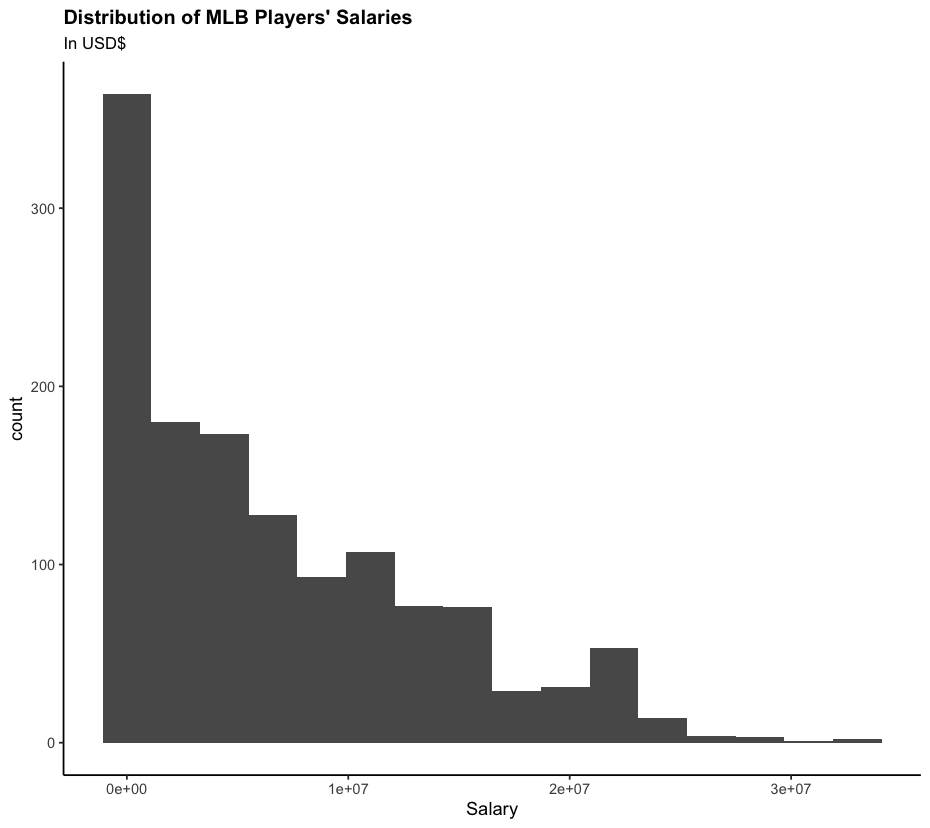

In [227]:
options(repr.plot.width = 7.75, repr.plot.height = 6.9)
ggplot(full_stats, aes(Salary)) + geom_histogram(binwidth = 2200000) + theme_classic() +
ggtitle(label = "Distribution of MLB Players' Salaries", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 12), plot.subtitle = element_text(size = 10))

Our second visualization is a box plot that allows us to identify any outliers from our response variable. Below, we can see that there are four MLB players that have a significantly larger salary than the rest of the players.

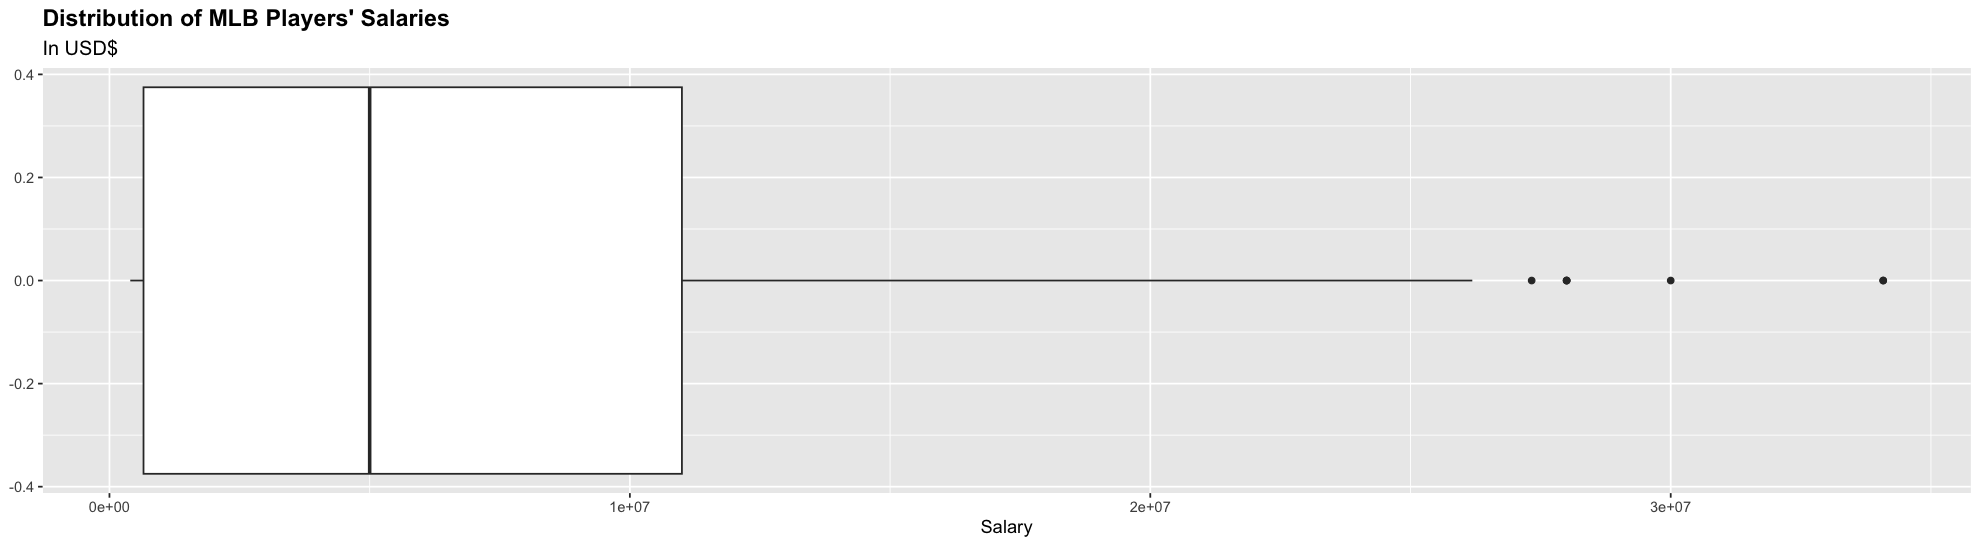

In [228]:
options(repr.plot.width = 16.5, repr.plot.height = 4.55)
ggplot(full_stats, aes(Salary)) + geom_boxplot() +
ggtitle(label = "Distribution of MLB Players' Salaries", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 14), plot.subtitle = element_text(size = 12))

One of the variables outside of performance statistics that we are interested in is `Season`. We assume that salaries will generally increase over time due to inflation, but to verify we created a violin plot to compare the salary distribution by season. Here, we can see there was a slight increase for star players, but we can also see the minimum salary generaly remained constant.

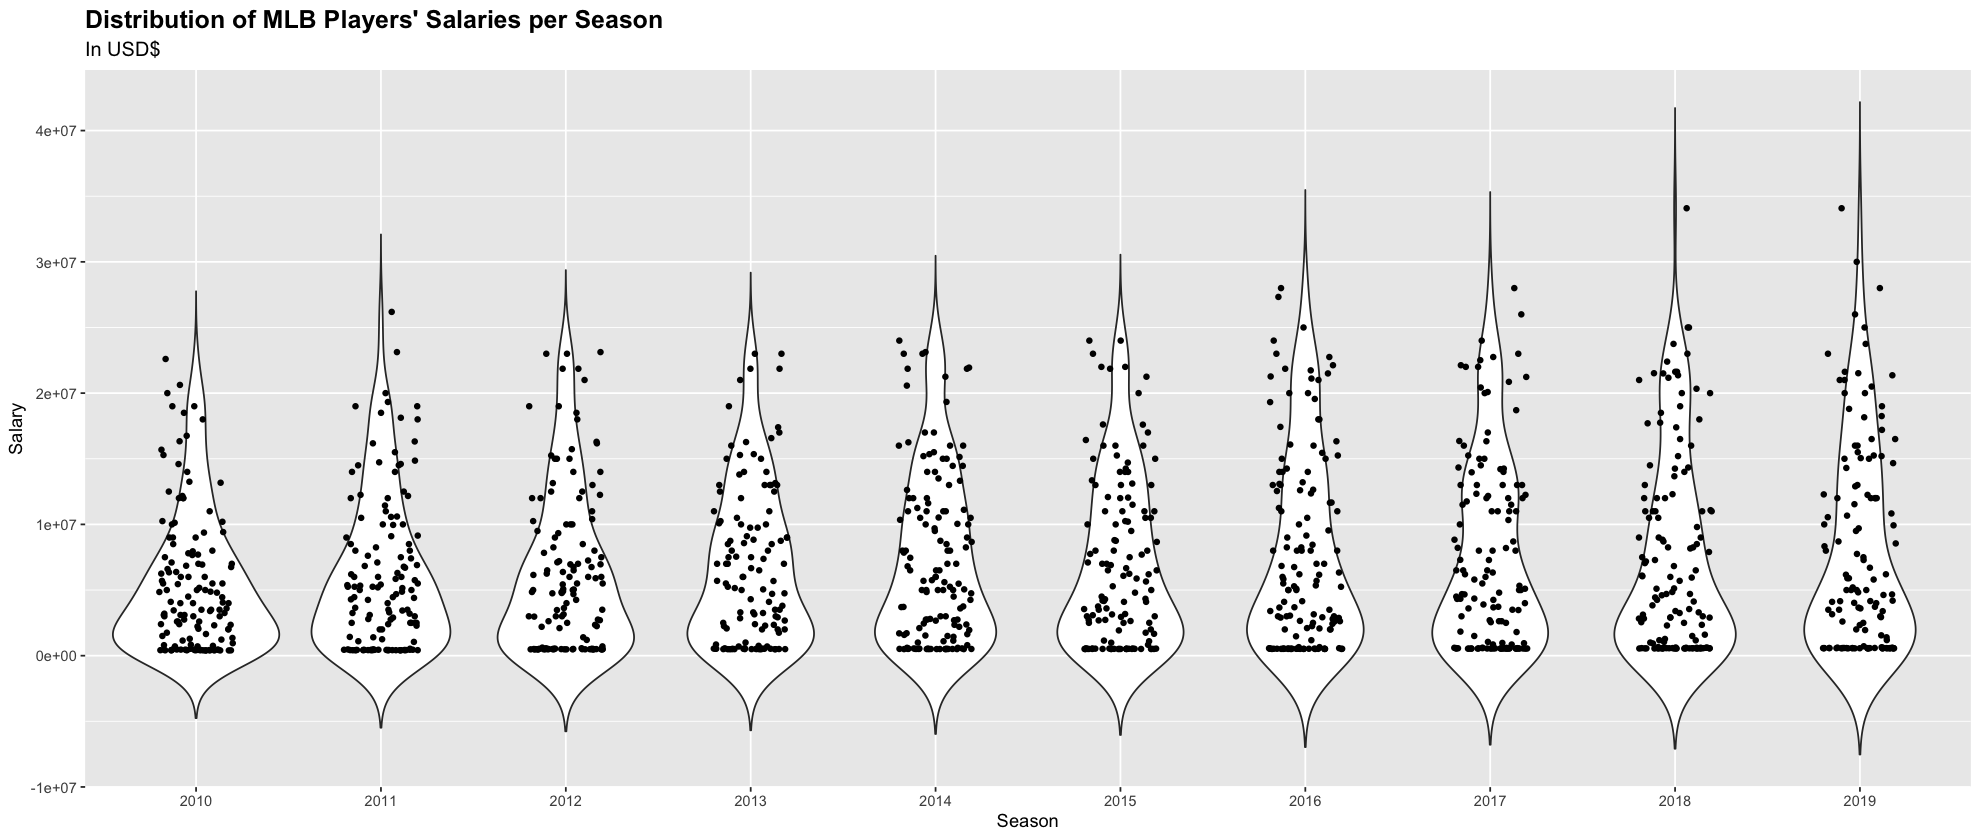

In [229]:
options(repr.plot.width = 16.5, repr.plot.height = 7)
ggplot(full_stats, aes(as.factor(Season), Salary)) + geom_violin(trim=FALSE) +
ggtitle(label = "Distribution of MLB Players' Salaries per Season", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 15), plot.subtitle = element_text(size = 12)) +
geom_jitter(shape=16, position=position_jitter(0.2)) + xlab("Season")

Another variable aside from performance statistics we are interested in is `Age`. We assume that salaries will generally increase with age. To verify, we created a scatter plot. Here, we can see a positive linear relationship.

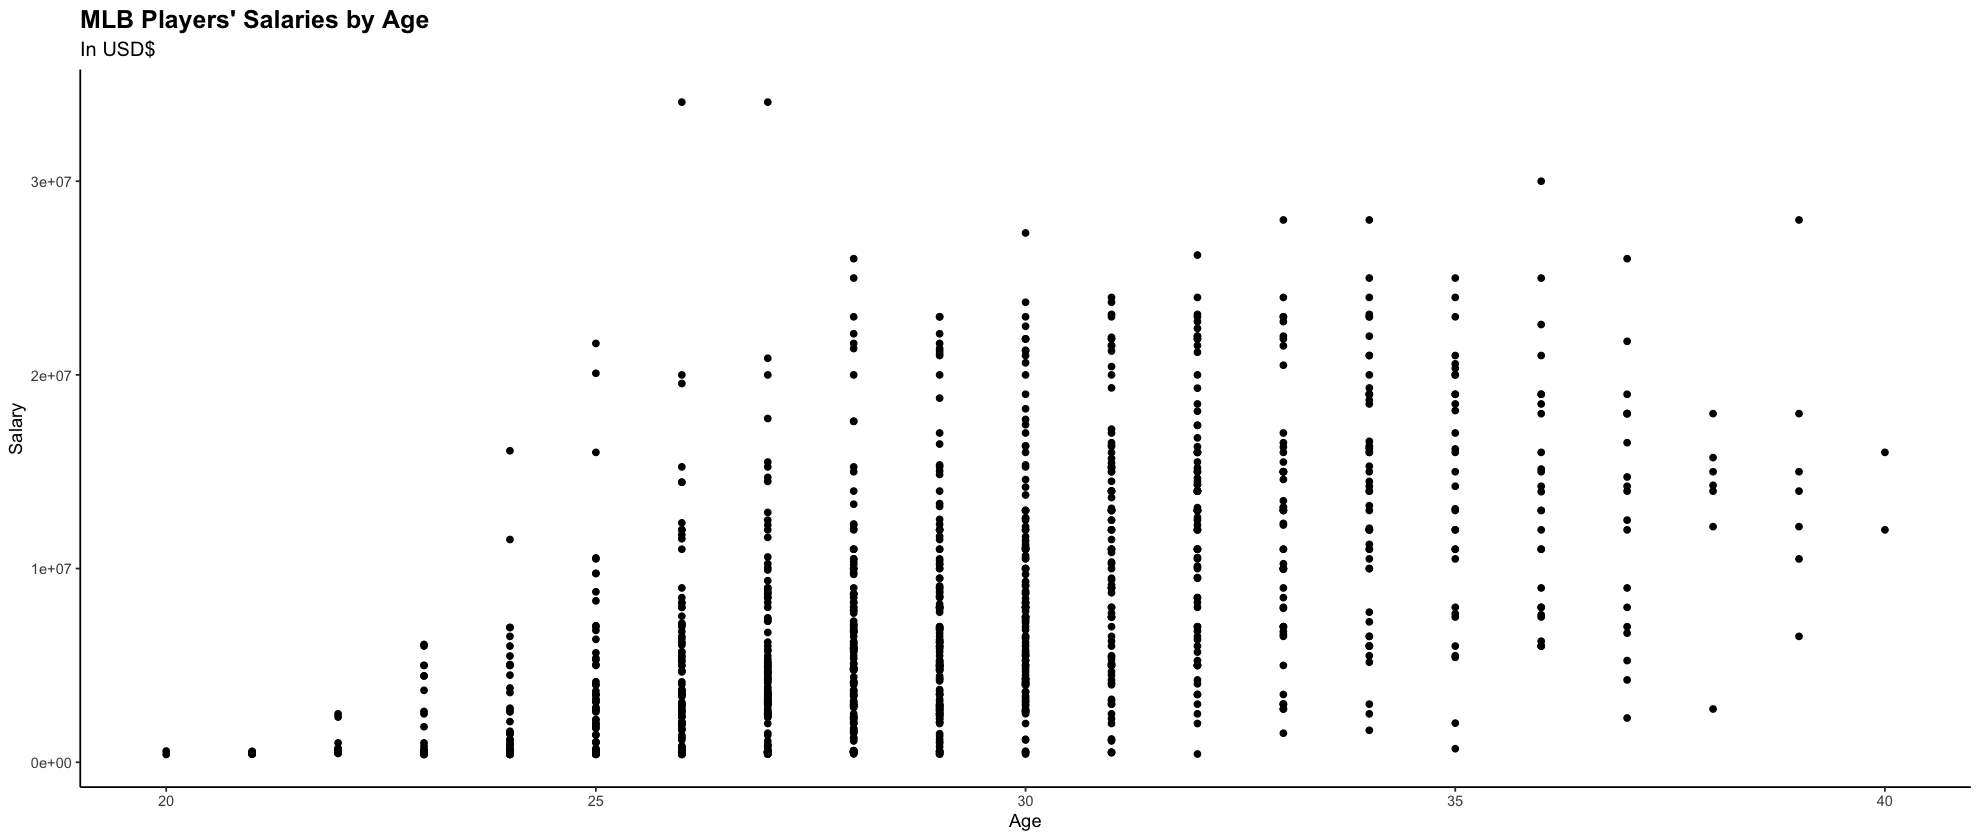

In [230]:
ggplot(full_stats, aes(Age, Salary)) + geom_point() + theme_classic() +
ggtitle(label = "MLB Players' Salaries by Age", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 15), plot.subtitle = element_text(size = 12))

## <font color='navy'> Explore Correlations </font>  <a id='explore-correlations'></a>
---

The next step to our analysis is to observe the correlation between our variables. Because we are working with so many variables, using a scatterplot matrix wouldn't give us a clear visualization of the correlations. Instead, we created a correlation table to show the correlation between `Salary` and each of the predictors, as well as the correlation the predictors have with one another. Notice we had to transform our `POS` predictor from type factor to type numeric to make our code run.

Focusing on our response variable, we can see that there appears to be a strong positive linear relationship between `Salary` and `Age`. There also appears to be a negative linear relationship between `Salary` and the variables `X3B`, `SB`, `CS`, and `SH`.

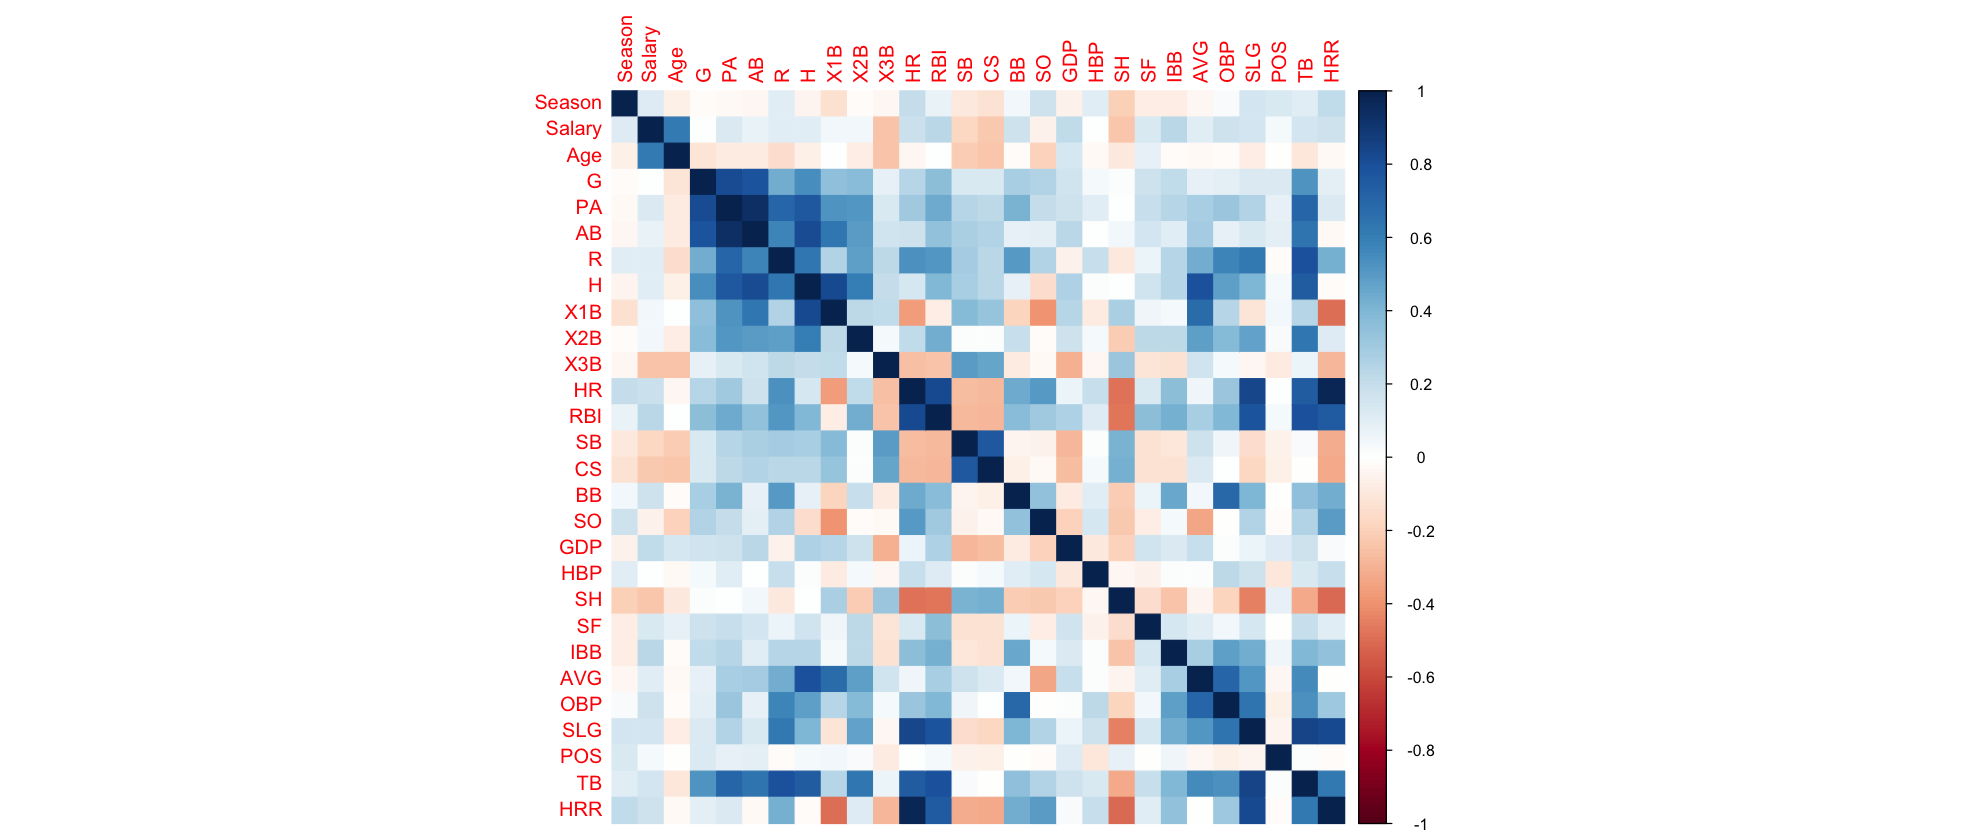

In [233]:
# Get all unique values of the "POS" column
unique_positions <- unique(full_stats$POS)

# Create a mapping from unique positions to numeric values
position_mapping <- setNames(1:length(unique_positions), unique_positions)

# Overwrite POS column with numeric values based on the mapping
full_stats$POS <- position_mapping[full_stats$POS]

# Calculate the correlation matrix including the encoded 'POS' columns
correlation_matrix <- cor(full_stats)

# Create a correlation plot
corrplot(correlation_matrix, method = "color")

To view the Pearson correlation (r), we created a correlation matrix and subsetted it so we see the Pearson correlations associated with our response variable. Immediately, we can see that `Age` has the highest Pearson correlation (aside from `Salary` itself) which reflects what is shown in the table above.

In [236]:
# Calculate the correlation matrix
corr_matrix <- cor(full_stats, use = "pairwise.complete.obs")

# Convert the correlation matrix to a dataframe
corr_df <- as.data.frame(corr_matrix)

# Extract the correlations for the "Salary" column
salary_correlations <- corr_df["Salary", ]

# Print the correlations for the "Salary" column
print(salary_correlations)

         Season Salary       Age           G        PA        AB         R
Salary 0.113152      1 0.6150657 0.001247975 0.1213036 0.0728405 0.1021557
               H        X1B        X2B       X3B        HR       RBI        SB
Salary 0.1093473 0.04978833 0.04915853 -0.246168 0.1830311 0.2399469 -0.173514
               CS        BB          SO       GDP         HBP        SH
Salary -0.2267173 0.1756601 -0.05978257 0.2151412 0.007542895 -0.233234
              SF       IBB       AVG       OBP       SLG        POS        TB
Salary 0.1344303 0.2336193 0.1017636 0.1787862 0.1570588 0.03649542 0.1581859
             HRR
Salary 0.1752999


## <font color='navy'> Response Variable </font>  <a id='response-variable'></a>
---

Our chosen response variable for our regression analysis is `Salary`, which represents an MLB player's paid salary during one season.  We have chosen this to be our response variable because we are interested in helping the Giants maximize player strength, __given an allocated budget.__  By predicting player salary, the team will be able to choose the best players that still fit within their budget.  Through our analysis, we are expecting to find that performance stats such as home-run ratio and total bases are significant indicators of salary -- it is reasonable to assume that star players with high stats would be paid more in a season.  We are also expecting to find that non-performance-related variables, such as age and season, are also significant indicators of salary -- it would make sense that players who have more experience in the MLB would be paid more as well.

## <font color='navy'> Simple Linear Regression </font>  <a id='simple-linear-regression'></a>
---

### <font color='navy'> SLR Model 1 </font>
For our first model, we were interested in seeing how `Age` influences a player's salary. By our summary printout, we see that our first simple regression model gives us an __intercept coefficient of -24,711,053, and an `Age` coefficient of 1,110,593.__  Thus, we can express our line of best fit by the equation:
<br><br>$$Y=-24711053+1110593X_1$$

According to our model, if a player's age increases by one year, we would expect his salary to increase by 1,110,593.  If $X_1=0$, then the player would have a salary of -24,711,053.

For our independent variable, Model 1 gives us a __p-value of less than $2\times10^{-16}$.__ This value represents the __chance of obtaining our current model, assuming there is no relationship between `Salary` and `Age`.__  When testing for significance, it is common to use a __benchmark value of 0.05__ -- p-values below this benchmark indicate a __relationship between the two variables.__  Since our p-value for `Age` is less than our benchmark of 0.05, we can say that __`Age` is a significant indicator of `Salary`.__

Finally, Model 1 gives us an __adjusted $R^2$ value of 0.3778,__ which means that our model explains 37.78\% of the variation we see in `Salary`.  It might be reasonable to add another independent variable to this model to improve it.

In [237]:
slr_mod1 <- lm(Salary ~ Age, data = full_stats)
summary(slr_mod1)


Call:
lm(formula = Salary ~ Age, data = full_stats)

Residuals:
      Min        1Q    Median        3Q       Max 
-14741470  -3525664  -1049099   2393272  29918976 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -24711053    1122268  -22.02   <2e-16 ***
Age           1110593      38995   28.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5283000 on 1333 degrees of freedom
Multiple R-squared:  0.3783,	Adjusted R-squared:  0.3778 
F-statistic: 811.1 on 1 and 1333 DF,  p-value: < 2.2e-16


### <font color='navy'> SLR Model 2 </font>

For our second model, we were interested in seeing how `Season` influences a player's salary. Our model gives us an __intercept coefficient of -522,777,674, and a `Season` coefficient of 262,976.__  Thus, we can express our line of best fit by the equation: <br><br>$$Y=-522777674+262976X_1$$

According to our model, for every one unit increase in `Season`, we would expect a player's salary to increase by 262,976.  If $X_1=0$, then the player would have a salary of -522,777,674.

Model 2 gives us a __p-value of $3.42\times10^{-5}$.__ Since this value is less than our benchmark of 0.05, we can say that __`Season` is a significant indicator of `Salary`.__

Finally, Model 2 gives us an __adjusted $R^2$ value of 0.01206,__ which means that our model explains 1.206\% of the variation we see in `Salary`.

In [238]:
slr_mod2 <- lm(Salary ~ Season, data = full_stats)
summary(slr_mod2)


Call:
lm(formula = Salary ~ Season, data = full_stats)

Residuals:
     Min       1Q   Median       3Q      Max 
-7614819 -5623765 -1843868  4086669 26176489 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -522777674  127410949  -4.103 4.32e-05 ***
Season          262976      63247   4.158 3.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6657000 on 1333 degrees of freedom
Multiple R-squared:  0.0128,	Adjusted R-squared:  0.01206 
F-statistic: 17.29 on 1 and 1333 DF,  p-value: 3.417e-05


### <font color='navy'> SLR Model 3 </font>

For our third model, we were interested in seeing how `X3B` influences a player's salary. Our model gives us an __intercept coefficient of 8,829,581, and a `X3B` coefficient of -614,438.__  Thus, we can express our line of best fit by the equation: <br><br>$$Y=8829581-614438X_1$$

According to our model, for every one unit increase in `X3B`, we would expect a player's salary to decrease by 614,438.  If $X_1=0$, then the player would have a salary of 8,829,581.

Model 3 gives us a __p-value of less than $2\times10^{-16}$.__ Since this value is less than our benchmark of 0.05, we can say that __`X3B` is a significant indicator of `Salary`.__

Finally, Model 3 gives us an __adjusted $R^2$ value of 0.05989,__ which means that our model explains 5.989\% of the variation we see in `Salary`.

In [240]:
slr_mod3 <- lm(Salary ~ X3B, data = full_stats)
summary(slr_mod3)


Call:
lm(formula = Salary ~ X3B, data = full_stats)

Residuals:
     Min       1Q   Median       3Q      Max 
-8415581 -5201548 -1571829  4013733 27711504 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8829581     266732  33.103   <2e-16 ***
X3B          -614438      66261  -9.273   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6494000 on 1333 degrees of freedom
Multiple R-squared:  0.0606,	Adjusted R-squared:  0.05989 
F-statistic: 85.99 on 1 and 1333 DF,  p-value: < 2.2e-16


### <font color='navy'>SLR Model 4 </font>

For our fourth model, we were interested in seeing how `HRR` influences a player's salary. Our model gives us an __intercept coefficient of 4,619,940, and a `HRR` coefficient of 64,410,675.__  Thus, we can express our line of best fit by the equation: <br><br>$$Y=4619940+64410675X_1$$

According to our model, for every 0.01 unit increase in `HRR`, we would expect a player's salary to increase by 644,106.75.  If $X_1=0$, then the player would have a salary of 4,619,940.

Model 4 gives us a __p-value of less than $1.13\times10^{-10}$.__ Since this value is less than our benchmark of 0.05, we can say that __`HRR` is a significant indicator of `Salary`.__

Finally, Model 4 gives us an __adjusted $R^2$ value of 0.03,__ which means that our model explains 3\% of the variation we see in `Salary`.

In [241]:
slr_mod4 <- lm(Salary ~ HRR, data = full_stats)
summary(slr_mod4)


Call:
lm(formula = Salary ~ HRR, data = full_stats)

Residuals:
      Min        1Q    Median        3Q       Max 
-10255062  -5274622  -1909378   4153024  24130025 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4619940     406188  11.374  < 2e-16 ***
HRR         64410675    9907941   6.501 1.13e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6597000 on 1333 degrees of freedom
Multiple R-squared:  0.03073,	Adjusted R-squared:   0.03 
F-statistic: 42.26 on 1 and 1333 DF,  p-value: 1.126e-10


### <font color='navy'> SLR Model 5 </font>

For our fifth model, we were interested in seeing how `TB` influences a player's salary. Our final SLR model gives us an __intercept coefficient of 1,339,177, and a `TB` coefficient of 23,217.__  Thus, we can express our line of best fit by the equation: <br><br>$$Y=1339177+23217X_1$$

According to our model, for every one unit increase in `TB`, we would expect a player's salary to increase by 23,217.  If $X_1=0$, then the player would have a salary of 1,339,177.

Model 5 gives us a __p-value of less than $6.21\times10^{-9}$.__ Since this value is less than our benchmark of 0.05, we can say that __`TB` is a significant indicator of `Salary`.__

Finally, Model 5 gives us an __adjusted $R^2$ value of 0.02429,__ which means that our model explains 2.429\% of the variation we see in `Salary`.

In [243]:
slr_mod5 <- lm(Salary ~ TB, data = full_stats)
summary(slr_mod5)


Call:
lm(formula = Salary ~ TB, data = full_stats)

Residuals:
     Min       1Q   Median       3Q      Max 
-9108085 -5392774 -1975524  4079490 25871920 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1339177     982150   1.364    0.173    
TB             23217       3969   5.849 6.21e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6616000 on 1333 degrees of freedom
Multiple R-squared:  0.02502,	Adjusted R-squared:  0.02429 
F-statistic: 34.21 on 1 and 1333 DF,  p-value: 6.212e-09


### <font color='navy'> Model Comparison </font>

To identify the best SLR model, we select the model that explains the most variation of the dependent variable, `Salary`, e.g. the model with the highest adjusted $R^2$ value. The adjusted $R^2$ values of the 5 SLR models are as follows:

In [244]:
cat("Adjusted R-squared of slr_mod1:", summary(slr_mod1)$adj.r.squared, "\nAdjusted R-squared of slr_mod2:", 
    summary(slr_mod2)$adj.r.squared, "\nAdjusted R-squared of slr_mod3:", summary(slr_mod3)$adj.r.squared, 
    "\nAdjusted R-squared of slr_mod4:", summary(slr_mod4)$adj.r.squared, "\nAdjusted R-squared of slr_mod5:", 
    summary(slr_mod5)$adj.r.squared)

Adjusted R-squared of slr_mod1: 0.3778394 
Adjusted R-squared of slr_mod2: 0.01206278 
Adjusted R-squared of slr_mod3: 0.05989396 
Adjusted R-squared of slr_mod4: 0.03000293 
Adjusted R-squared of slr_mod5: 0.02429136

From above, we can see that SLR model 1 had the highest $R^2$ value. In other words, SLR model 1 explains the most variation in our response variable, `Salary`, out of the five. The plot below also gives us a visualization of the model.

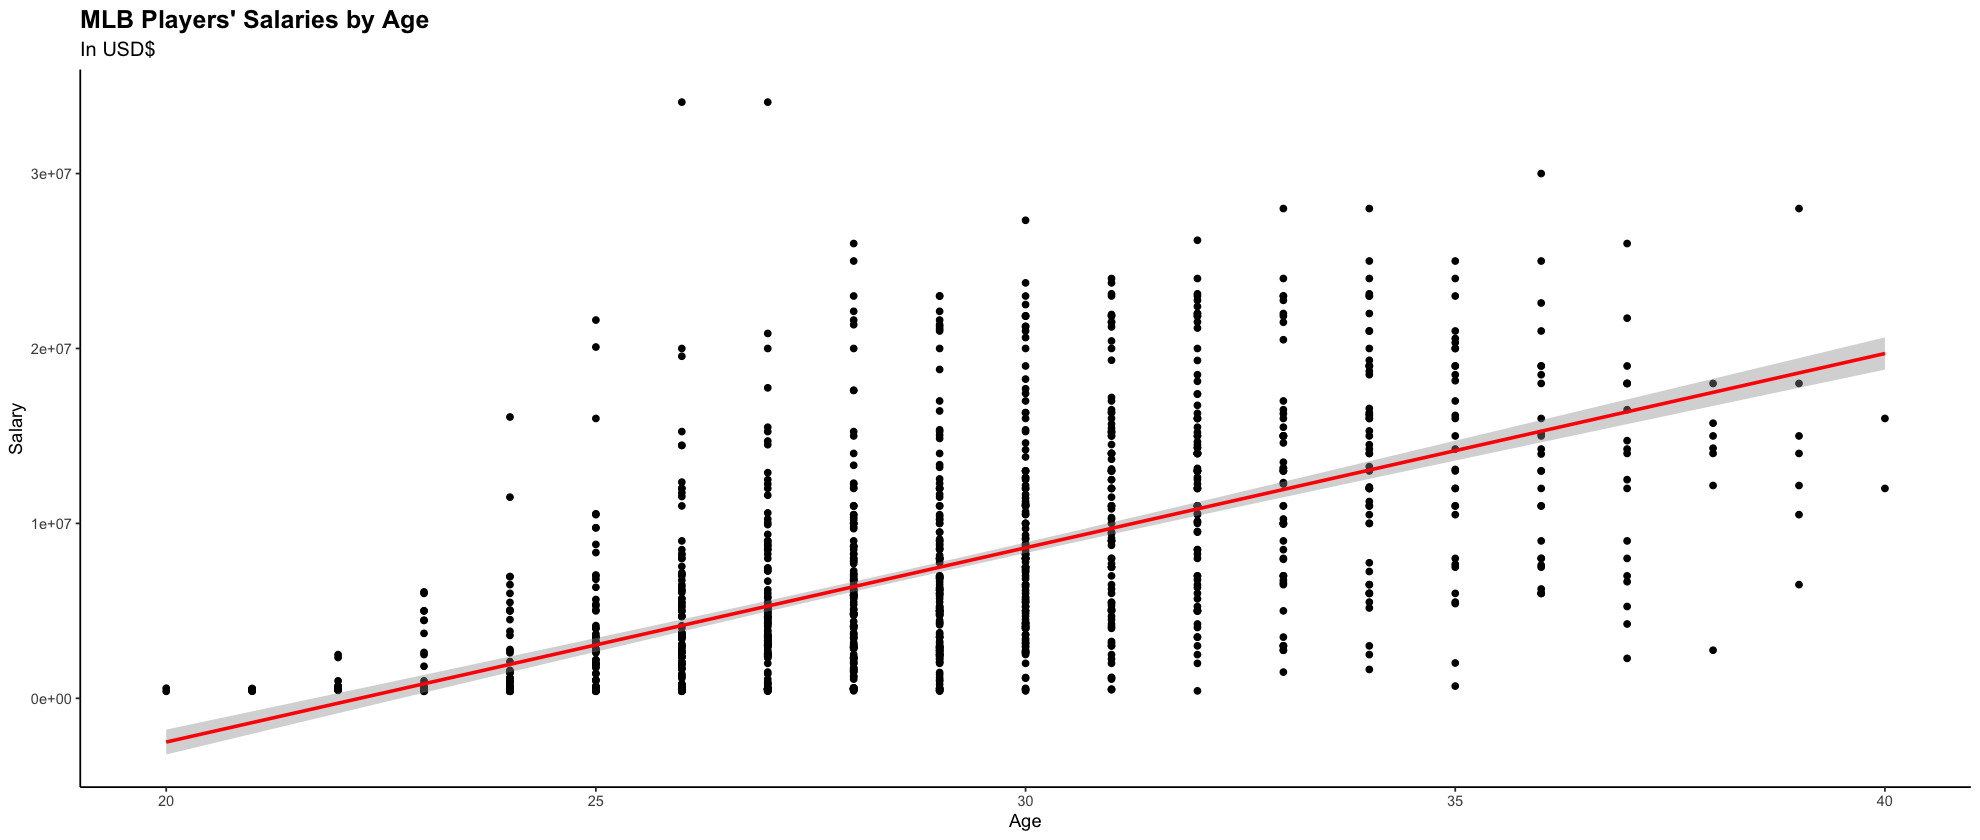

In [245]:
ggplot(full_stats, aes(Age, Salary)) + geom_point() + theme_classic() +
ggtitle(label = "MLB Players' Salaries by Age", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 15), plot.subtitle = element_text(size = 12)) + 
geom_smooth(method='lm', formula = y~x, col="red")

## <font color='navy'> Multiple Linear Regression </font> <a id='multiple-linear-regression'></a>
---

### <font color='navy'> MLR Model 1 </font>

In our first model, we are interested in studying how well `Season`, `Age`, `G`, `PA`, `GDP`, `SH`, and `IBB` influence an MLB player's salary. Running `lm()` on the specified variables and printing the summary, we can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median -642,452.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = -763020786 + 365783X_1 + 1097837X_2 - 132188X_3 + 31088X_4 + 101560X_5 - 191106X_6 + 308127X_7$$<br> This means when $X_1, ..., X_7 = 0$, an MLB player will have a salary of -\\$763,020,786. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4, X_5, X_6$, or $X_7$, there will be an increase/decrease in salary in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable is a significant indicator of `Salary`.
4. **Residual standard error**: MLR Model 1 has a residual standard error of 4,703,000 on 1327 degrees of freedom.
5. **Adjusted R-squared**: MLR Model 1 has an adjusted $R^2$ of 0.5071. This means that this model accounts for 50.71% of variation in `Salary`.

In [246]:
mlr_mod1 <- lm(Salary ~ Season + Age + G + PA + GDP + SH + IBB, data = full_stats)
summary(mlr_mod1)


Call:
lm(formula = Salary ~ Season + Age + G + PA + GDP + SH + IBB, 
    data = full_stats)

Residuals:
      Min        1Q    Median        3Q       Max 
-11739502  -3000590   -641452   2396296  23185108 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -763020786   93483119  -8.162 7.58e-16 ***
Season          365783      46344   7.893 6.15e-15 ***
Age            1097837      35611  30.829  < 2e-16 ***
G              -132188      20596  -6.418 1.92e-10 ***
PA               31088       3634   8.556  < 2e-16 ***
GDP             101560      25156   4.037 5.72e-05 ***
SH             -191106      51208  -3.732 0.000198 ***
IBB             308127      31207   9.874  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4703000 on 1327 degrees of freedom
Multiple R-squared:  0.5096,	Adjusted R-squared:  0.5071 
F-statistic:   197 on 7 and 1327 DF,  p-value: < 2.2e-16


### <font color='navy'> MLR Model 2 </font>

In our second model, we are interested in studying how well `Season`, `Age`, `G`, `PA`, `X2B`, `GDP`, `SH`, and `IBB` influence an MLB player's salary. Running `lm()` on the specified variables and printing the summary, we can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median -659,182.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = -748628908 + 358702X_1 + 1089378X_2 - 137297X_3 + 35147X_4 - 55298X_5 + 105658X_6 - 223686X_7 + 312266X_8$$<br> This means when $X_1, ..., X_8 = 0$, an MLB player will have a salary of -\\$748,628,908. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4, X_5, X_6, X_7$, or $X_8$, there will be an increase/decrease in salary in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable is a significant indicator of `Salary`.
4. **Residual standard error**: MLR Model 2 has a residual standard error of 4,692,000 on 1326 degrees of freedom.
5. **Adjusted R-squared**: MLR Model 2 has an adjusted $R^2$ of 0.5093. This means that this model accounts for 50.93% of variation in `Salary`.

In [250]:
mlr_mod2 <- lm(Salary ~ Season + Age + G + PA + X2B + GDP + SH + IBB, data = full_stats)
summary(mlr_mod2)


Call:
lm(formula = Salary ~ Season + Age + G + PA + X2B + GDP + SH + 
    IBB, data = full_stats)

Residuals:
      Min        1Q    Median        3Q       Max 
-11726484  -3016040   -659182   2399393  22983219 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -748628908   93419715  -8.014 2.42e-15 ***
Season          358702      46312   7.745 1.88e-14 ***
Age            1089378      35668  30.543  < 2e-16 ***
G              -137297      20636  -6.653 4.18e-11 ***
PA               35147       3928   8.947  < 2e-16 ***
X2B             -55298      20611  -2.683  0.00739 ** 
GDP             105658      25144   4.202 2.82e-05 ***
SH             -223686      52512  -4.260 2.19e-05 ***
IBB             312266      31173  10.017  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4692000 on 1326 degrees of freedom
Multiple R-squared:  0.5123,	Adjusted R-squared:  0.5093 
F-statistic: 174.1 on 8 and 1326 DF,

### <font color='navy'> MLR Model 3 </font>

In our second model, we are interested in studying how well `Season`, `Age`, `G`, `PA`, `X2B`, `RBI`, `GDP`, `SH`, and `IBB` influence an MLB player's salary. Running `lm()` on the specified variables and printing the summary, we can make the following observations:
1. **Residuals**: The distribution of residuals is centered around a median -569,414.
2. **Coefficients**: The equation of the fitted line is <br><br>$$~Y = -736921763 + 353000X_1 + 1088806X_2 - 138625X_3 + 32978X_4 - 63191X_5 + 22108X_6 + 98285X_7 - 160172X_8 + 289396X_9$$<br> This means when $X_1, ..., X_9 = 0$, an MLB player will have a salary of -\\$736,921,763. We can also say for every one unit increase in either $X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8$, or $X_9$, there will be an increase/decrease in salary in the value of the corresponding slope.
3. **P-value:** We can also see from the p-value benchmark that every variable is a significant indicator of `Salary`.
4. **Residual standard error**: MLR Model 3 has a residual standard error of 4,682,000 on 1325 degrees of freedom.
5. **Adjusted R-squared**: MLR Model 3 has an adjusted $R^2$ of 0.5114. This means that this model accounts for 51.14% of variation in `Salary`.

In [251]:
mlr_mod3 <- lm(Salary ~ Season + Age + G + PA + X2B + RBI + GDP + SH + IBB, data = full_stats)
summary(mlr_mod3)


Call:
lm(formula = Salary ~ Season + Age + G + PA + X2B + RBI + GDP + 
    SH + IBB, data = full_stats)

Residuals:
      Min        1Q    Median        3Q       Max 
-11561224  -3011989   -569414   2455845  22553705 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -736921763   93329655  -7.896 6.00e-15 ***
Season          353000      46265   7.630 4.47e-14 ***
Age            1088806      35592  30.591  < 2e-16 ***
G              -138625      20598  -6.730 2.52e-11 ***
PA               32978       4008   8.227 4.54e-16 ***
X2B             -63191      20792  -3.039 0.002419 ** 
RBI              22108       8546   2.587 0.009792 ** 
GDP              98285      25251   3.892 0.000104 ***
SH             -160172      57867  -2.768 0.005720 ** 
IBB             289396      32338   8.949  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4682000 on 1325 degrees of freedom
Multiple R-squared:  0.5147,	Adju

### <font color='navy'> Model Comparison pt. 2 </font>

To identify the best MLR model, we select the model that explains the most variation of the dependent variable, `Salary`, e.g. the model with the highest adjusted $R^2$ value. The adjusted $R^2$ values of the 3 MLR models are as follows:

In [252]:
cat("Adjusted R-squared of mlr_mod1:", summary(mlr_mod1)$adj.r.squared, "\nAdjusted R-squared of mlr_mod2:", 
    summary(mlr_mod2)$adj.r.squared, "\nAdjusted R-squared of mlr_mod3:", summary(mlr_mod3)$adj.r.squared)

Adjusted R-squared of mlr_mod1: 0.507054 
Adjusted R-squared of mlr_mod2: 0.5093456 
Adjusted R-squared of mlr_mod3: 0.5114427

From above, we can see that MLR model 3 had the highest $R^2$ value. In other words, MLR model 3 explains the most variation in our response variable, `Salary`. We can also see how MLR model 3 compares with the best SLR model we found, SLR Model 1:

In [253]:
cat("Adjusted R-squared of mlr_mod3:", summary(mlr_mod3)$adj.r.squared, "\nAdjusted R-squared of slr_mod1:", 
    summary(slr_mod1)$adj.r.squared)

Adjusted R-squared of mlr_mod3: 0.5114427 
Adjusted R-squared of slr_mod1: 0.3778394

There is a significant improvement in the $R^2$ value when using more than one variable to explain the variation in `Salary`. We can conclude that MLR Model 3 is indeed the best model that delivers the highest $R^2$ value.

## <font color='navy'> Project Report </font> <a id='project-report'></a>
---
### Introduction
Over the past decade, the San Francisco Giants put together one of the strongest dynasties in baseball history, bringing home the World Series title in 2010,  2012, and 2014. However, every dynasty has an end. In recent years, we have seen a significant decline in the team’s performance. As a matter of fact, the team has not made it to the playoffs since 2016. And most of the players from their 2014 championship team are no longer there –  infielders Brandon Belt and Brandon Crawford being the exceptions. Since then, the Giants have struggled to improve their a roster, but we’re here to help. The goal of our investigation is to examine the correlation between batting statistics and salary from players over the past decade, as well as variables aside from performance statistics, so that we can build a model that can project a player's salary. Given the San Francisco Giant's budget for acquiring new players, they can use the model to maximize the stats of the players they can afford.

### Data Collection
Our data is collected from two sources. Our first data set is from *FanGraphs Baseball*, a website that provides statistics for every player in Major League Baseball history. From here, we downloaded a CSV file that contained the batting statistics for every player from the last decade, e.g. 2010 – 2019. Our second data set is from *USA TODAY’s baseball salaries database*, which contains year-by-year listings of salaries for MLB players. Since both datasets contained information necessary for our study, we merged them into a single data frame that lists one athlete’s performance statistics over a course of a season, as well as their corresponding salary. Now, we were able to start assessing our data in R.

### Assessing Our Data
Our starting data frame contained 344 variables, many of which were unnecessary for our analysis. For the purpose of our investigation, we removed the irrelevant columns. That left us with 25 predictor variables and our response variable, salary. Additionally, we assessed the data type of our variables. At this point, we learned that our response variable, salary, was of factor type. In order to use the column, we transformed it into a numeric variable. The rest of our variables are of either numeric or integer type, with position being the only factor variable. Since all but one of our variables take finite values, we can also conclude that they are of discrete type, while position is of categorical type.

### Data Cleaning & Adaptation
Before we could begin to build our regression model, it is essential to cleanse our data so that we can provide information that is of the highest quality. In doing so, we checked for inaccurate, incomplete, or unreasonable data. Fortunately, we did not detect any missing values. Additionally, we wanted to check for any unreasonable values in our response variable, salary. We found one observation with a salary of \\$0 leaving us with 1,335 observations. Because it does not seem reasonable for a player to make \\$0, we removed that data point. Following data cleansing, we created two columns, one for Total Bases (TB) and another for Home Run Ratio (HRR), so that we can also check for their significance in determining a player's salary.

### Descriptive Visualizations
With 1,335 observations, a few descriptive visualizations would show us different aspects of our response variable, salary. For our first visualization, we used a histogram to give us a better sense of the distribution of our response variable, salary. Because the data is shifted to the left, we can say that salary has a left-skewed distribution. This also tells us that most players earn below $10 million.

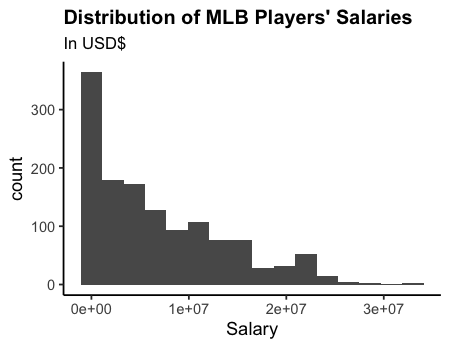

In [36]:
options(repr.plot.width = 3.75, repr.plot.height = 2.9)
ggplot(full_stats, aes(Salary)) + geom_histogram(binwidth = 2200000) + theme_classic() +
ggtitle(label = "Distribution of MLB Players' Salaries", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 12), plot.subtitle = element_text(size = 10))

We created a box plot for our second visualization so that we could identify the quartiles, as well as any existing outliers from our response variable, salary. Below, we can see that 75% of players make salaries below $11 million. Additionally, we can see that there are four outliers. In other words, there are four players who have made significantly more than the rest of the players. 

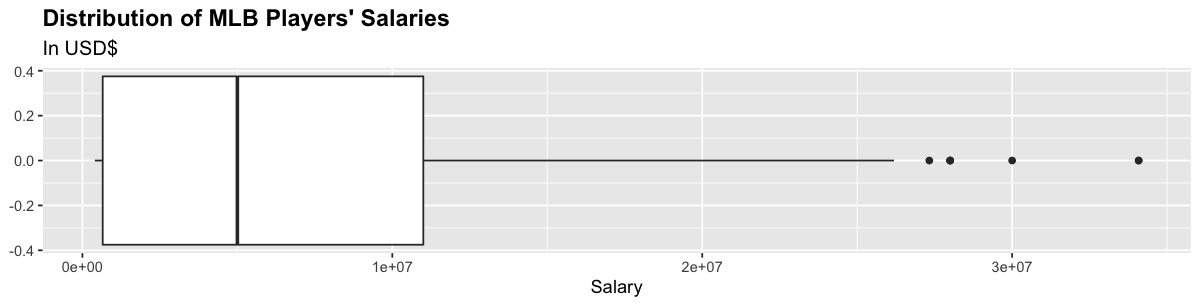

In [37]:
options(repr.plot.width = 10, repr.plot.height = 2.55)
ggplot(full_stats, aes(Salary)) + geom_boxplot() +
ggtitle(label = "Distribution of MLB Players' Salaries", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 14), plot.subtitle = element_text(size = 12))

Because one of our variables of interest is season, we created a violin plot to visualize the distribution of salary by season. Prior to plotting, we assumed that salaries would have a general increase over time due to inflation. From our plot below, we can see from the extension of the tails that there was a slight increase for star players but the minimum salary remained the same.

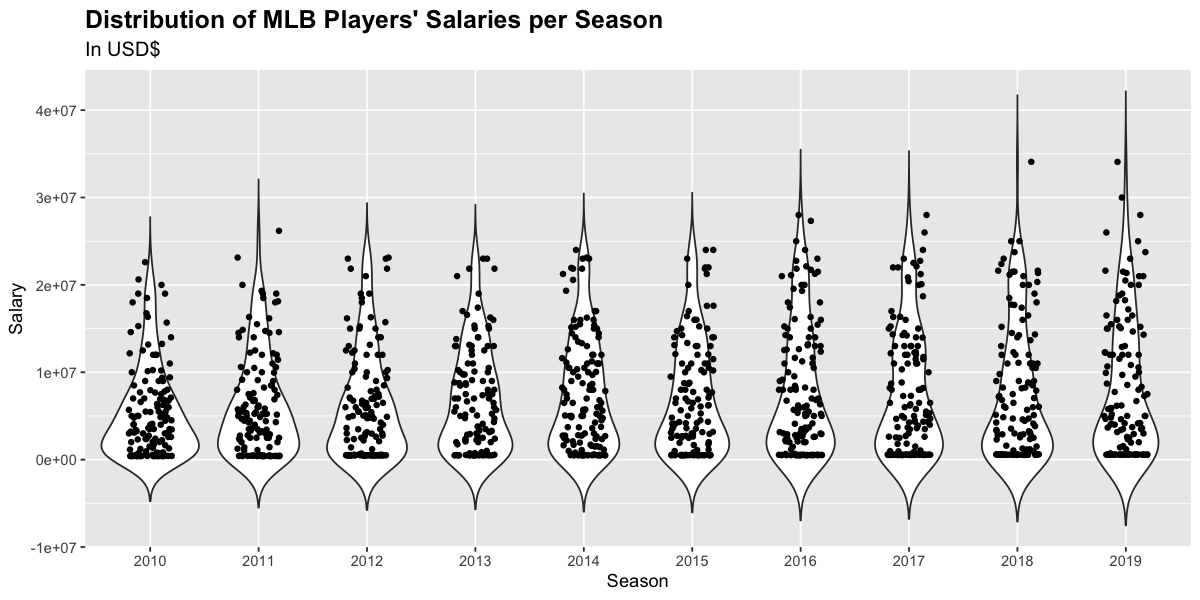

In [38]:
options(repr.plot.width = 10, repr.plot.height = 5)
ggplot(full_stats, aes(as.factor(Season), Salary)) + geom_violin(trim=FALSE) +
ggtitle(label = "Distribution of MLB Players' Salaries per Season", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 15), plot.subtitle = element_text(size = 12)) +
geom_jitter(shape=16, position=position_jitter(0.2)) + xlab("Season")

Another one of our variables of interest aside from performance statistics was age. We wanted to study the influence age had on a player’s salary. We assumed that a player’s salary would increase with age due to their gained experience. To verify, we created a scatter plot with Age on the x-axis and Salary on the y-axis. Below, we can see that salary does generally increase with age.

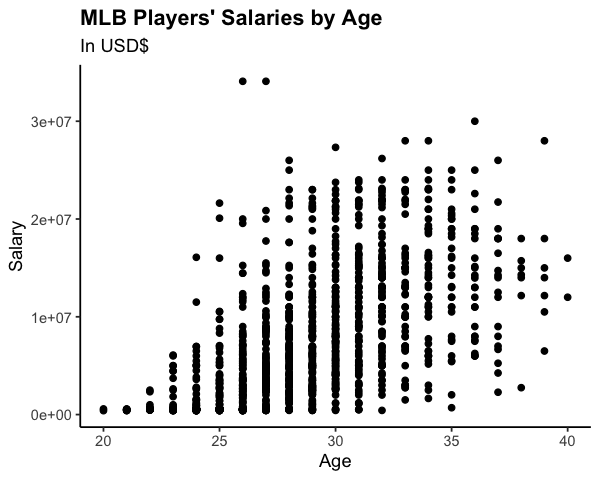

In [39]:
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(full_stats, aes(Age, Salary)) + geom_point() + theme_classic() +
ggtitle(label = "MLB Players' Salaries by Age", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 13), plot.subtitle = element_text(size = 11))

###  Correlations

After some simple visualization of our data, the next step in our analysis was to look for variables that were correlated with `Salary`, which we accomplished using the correlation matrix below.

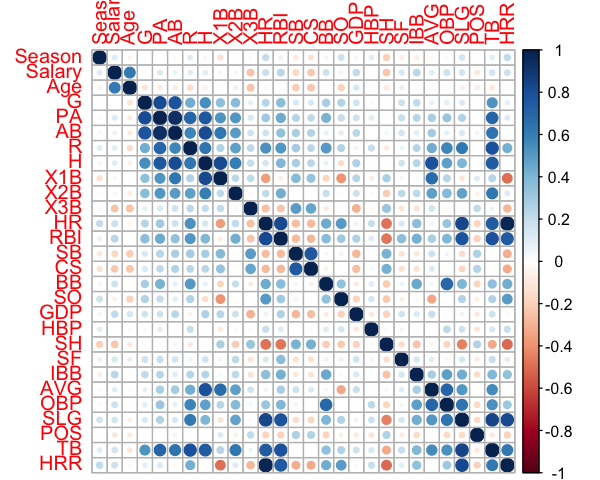

In [40]:
corrplot(cor(full_stats))

In the figure above, a __red color indicates a negative correlation__ between quantities (when one quantity increases, the other decreases), while a __blue color indicates a positive correlation__ (when one quantity increases, the other increases).  The stronger the color is, the stronger the association between quantities.  Looking at the row for `Salary`, we can see correlation with quantities of age and season, as expected from our above visualization plots.  However, we can also see that a player's salary is correlated with number of triples (`X3B`), home-run ratio (`HRR`), and total bases (`TB`).
### Simple Linear Regression Models

After using our correlation plot to find variables to test, our next step was to create models to see how well each of our chosen variables predicted a player's salary.  Using age, season, number of triples (`X3B`), home-run-ratio (`HRR`), and total bases (`TB`), we created 5 different models to predict a player's salary.  One of our models is below, which predicts a player's salary using age. 

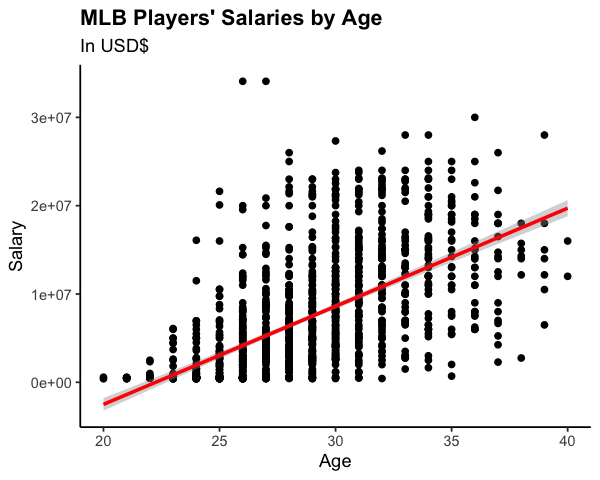

In [41]:
ggplot(full_stats, aes(Age, Salary)) + geom_point() + theme_classic() +
ggtitle(label = "MLB Players' Salaries by Age", subtitle = "In USD$") +
theme(plot.title = element_text(face = "bold", size = 13), plot.subtitle = element_text(size = 11)) + 
geom_smooth(method='lm', formula = y~x, col="red")

When looking for the best model, it is common practice to find what is called the $R^2$ value of our model.  In short, __the higher this value, the better our model fits our data.__  Looking at the $R^2$ values of the models we created, we found that our best model was the one that __predicted a player's salary using their age__ with an $R^2$ value of 0.3778.  Our model can be expressed using the equation: <br><br>$$Y=-24711053+1110593X_1$$<br>  where $X_1$ represents a player's age in years, and $Y$ represents that player's salary.  Using this model, we would expect a player's salary would increase by \\$1,110,593 if age increased by one year.  However, this model also grows weaker as we predict salaries for players further outside the age range in our dataset -- we get a salary of -\\$24,711,053 for a player with a theoretical age of 0.  If we were to improve this model, we would need to make sure it accounts for a wider age range of players.

### Multiple Linear Regression Models

After using one variable at a time to predict a player's salary, we then decided to create more models, but this time using __multiple variables at once__ to make our prediction.  Examining the $R^2$ values of our models once again, we determined that the best model in this group used __season, age, games played, plate appearances, doubles, RBI, GDP, sacrifice hits, and intentional walks__ to predict a player's salary. With an $R^2$ value of 0.5114, we can say this model explains 51.14% of variation in our response variable, salary. We can also say for every one unit increase in our variables there will be a increase/decrease in a player's salary in the unit of the corresponding slope. For example, for every one unit increase in season, e.g. every passing year, there will be a \\$353,000 increase in a player's salary.

### Model Comparison

After determining our best models in each group, our last step was to compare the two models to determine the best model overall.  By examining our $R^2$ values for the two models, we determined that our best model was our __multi-variable model.__  Since this model has the greater $R^2$ value, we know that __adding more variables directly contributed to predicting player salary__ -- this is not always the case when using multiple variables to make predictions.  If we were to take this analysis further, we would fix the errors in prediction outside the age range of our given players, so we may make salary predictions for more players in the MLB.

### Conclusion

Based on our above analysis and findings, __we recommend that the SF Giants use our model to choose the ideal players to improve their roster.__  If the team has an estimated budget for acquiring new players, our model would be helpful in making the best use of their budget by allowing them to maximize stats of the players they can afford.  Furthermore, if the team's allocated budget changes going forward, they can expand or contract their selection of available players and still use our model to pick the best players under the circumstances.  We hope the team finds this analysis useful, and wish them all the best this season.

## <font color='navy'> Originality </font>  <a id='originality'></a>
---

While the 2011 film "Moneyball" has helped popularize the application of data and statistical analysis to baseball, it is no surprise that there is an endless number of studies out there that have used sabermetrics to evaluate and compare team and player records. There are many that focus their study on using linear regression to help evalaute and improve the performance of the team and/or individual players. For instance, in 2006 Dennis Moy published his [thesis](https://www.stat.berkeley.edu/~aldous/157/Old_Projects/moy.pdf) to the University of California Berkeley where he used baseball statistics, similar to the ones used in our study, to build a regression model that could project offensive and defensive efficiancy. In another [study](https://people.duke.edu/~rnau/regexbaseball.htm) from Duke University, the author also used similar baseball statistics but this time they built a linear regression model that could predict a player's batting average.

While the application of sabermetrics has become very popular in evaluating team and individual performance, we knew it would be difficult to think of study that has never been attempted. We ultimately decided to focus our attention away from a regression model that could predict team and player performance, but instead try to use common battings statistics to predict a player's salary. Again, we searched the web for any similar work so that we could differentiate ourselves. In 2014, Michael Glenn Hoffman published his [thesis](https://library.ndsu.edu/ir/bitstream/handle/10365/27563/Analysis%20of%20Salary%20for%20Major%20League%20Baseball%20Players.pdf?sequence=1) to North Dakota State University where he used similar baseball statistics to project a player's salary. Though we found a similar study, we were still pretty set on building a model to project a player's salary. To differentiate our work, we decided to look at variables aside from performance statistics, such as *age*, *season*, and *position*. This worked to our favor because 2 out of the 3 ended up in our final model.